### Prototype synthetic data generator

This will create a `pandas` dataframe that contains a grid of features and a single output column based on a non-linear function of the features.

_Note_ this code uses the new f-strings in Python 3.6 and is not backward compatible.

In [67]:
import itertools
import math

import matplotlib as plt
import numpy as np
import pandas as pd

In [70]:
%matplotlib inline

In [76]:
FEATURE_MIN = -1
FEATURE_STEP = 0.1
FEATURE_MAX = 1 + FEATURE_STEP

In [77]:
base_feature = np.arange(FEATURE_MIN, FEATURE_MAX, FEATURE_STEP)

In [78]:
df1 = pd.DataFrame({'A' : base_feature})
df2 = pd.DataFrame({'B' : base_feature})
df3 = pd.DataFrame({'C' : base_feature})

Now, we want to create a function to make the cartesian product of the rows of two data frames and then we call it twice, once for df1 and df2 and then again with the result of the previous and df3.  Function is taken from this page:
https://stackoverflow.com/questions/13269890/cartesian-product-in-pandas/32700453

In [79]:
def cartesian(df1, df2):
    rows = itertools.product(df1.iterrows(), df2.iterrows())

    df = pd.DataFrame(left.append(right) for (_, left), (_, right) in rows)
    return df.reset_index(drop=True)

In [80]:
df_temp = cartesian(df1, df2)

In [81]:
df = cartesian(df_temp, df3)

In [82]:
df.head()

,A,B,C
0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-0.9
2,-1.0,-1.0,-0.8
3,-1.0,-1.0,-0.7
4,-1.0,-1.0,-0.6


In [83]:
df.count()

A    9261
B    9261
C    9261
dtype: int64

Now let's add the column with the complex non-linear function of the features.

 + df['B'] + df['C']

In [119]:
df['y'] = np.power(np.abs(df['A']), np.abs(df['B'])) - \
    np.power(np.abs(df['B']), np.abs(df['C'])) + \
    np.exp(np.abs(df['C'])) + \
    df['C'] - (np.power(df['C'], 3) / math.factorial(3)) - (np.power(df['C'], 5) / math.factorial(5)) - (np.power(df['C'], 7) / math.factorial(7)) + \
    -2.5

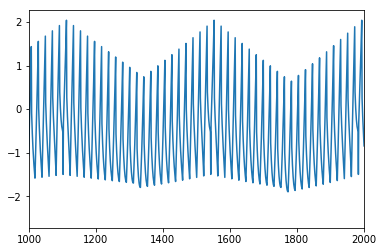

In [120]:
df['y'].plot(xlim=(1000, 2000))

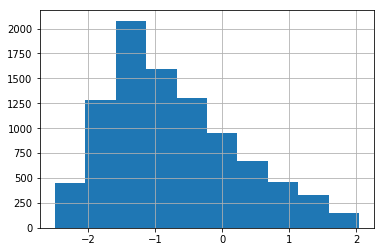

In [121]:
df['y'].hist()

In [124]:
df.to_csv('synthetic_data.tsv', sep='\t', index=False)